# Dataset
**Feature:**
   
   1 - age: usia (numerical)
   
   2 - job: pekerjaan (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   
   3 - marital: status pernikahan (categorical: "divorced","married","single"; note: "divorced" means divorced or widowed)
   
   4 - education: jenjang pendidikan (categorical: "primary","secondary","tertiary,"unknown")
   
   5 - default: gagal bayar (categorical: "no","yes")
   
   6 - balance: saldo uang di bank (numerical)
   
   7 - housing: memiliki pinjaman perumahan (categorical: "no","yes")
   
   8 - loan: memiliki pinjaman pribadi (categorical: "no","yes")
   
   9 - contact: jenis kontak (categorical: "cellular","telephone") 
   
   10 - month: bulan kontak terakhir (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   
   11 - day: tanggal kontak terakhir (numerical: 1-31)
   
   12 - duration: durasi kontak terakhir dalam hitungan detik (numerical)
   
   13 - campaign: total kontak yang dilakukan selama marketing campaign ini berlangsung (numerical)
   
   14 - pdays: jumlah hari yang yang telah berlalu setelah user ini dihubungi pada marketing campaign sebelumnya (numerical; -1 berarti client tidak pernah dikontak sebelumnya)
   
   15 - previous: total kontak yang dilakukan pada marketing campaign sebelumnya (numerical)
   
   16 - poutcome: hasil dari marketing campaign sebelumnya (categorical: "failure","unknown","other","success")
  
   **Feature Target:**
   
   17 - y - klien berlangganan/subscribe deposit (binary: "yes","no")

# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv', sep=';')
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Pada dataset ini, targetnya adalah kolom `y`, yaitu menunjukkan user yang subscribe ke term deposit (yes/no)

## Descriptive Statistics

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
train.duplicated().any()

False

In [ ]:
train.isnull().any().sum()

0

In [ ]:
print(f'Pada dataset terdapat {train.shape[0]} baris dan {train.shape[1]} kolom')

Pada dataset terdapat 45211 baris dan 17 kolom


Pada dataset tidak ada data yang duplikat

Pengamatan:
1. Data train terdiri dari 17 kolom dan 45211 baris
2. Tidak terdapat missing values, tetapi terdapat unknown values pada beberapa feature
3. Sepertinya tidak ada issue yang mencolok pada tipe data untuk setiap kolom (sudah sesuai)
4. y adalah Feature Target

Saran: mengubah unknown values yang terdapat pada beberapa feature

### A. Pengecekan Tipe Data

Kita pisahkan kolom berdasarkan tipenya, numerikal (integer dan float) dan categorical (string)

In [3]:
nums = train.select_dtypes(include=[np.number])
nums.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [4]:
cats = train.select_dtypes(exclude=[np.number])
cats.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [ ]:
nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   day       45211 non-null  int64
 3   duration  45211 non-null  int64
 4   campaign  45211 non-null  int64
 5   pdays     45211 non-null  int64
 6   previous  45211 non-null  int64
dtypes: int64(7)
memory usage: 2.4 MB


In [ ]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        45211 non-null  object
 1   marital    45211 non-null  object
 2   education  45211 non-null  object
 3   default    45211 non-null  object
 4   housing    45211 non-null  object
 5   loan       45211 non-null  object
 6   contact    45211 non-null  object
 7   month      45211 non-null  object
 8   poutcome   45211 non-null  object
 9   y          45211 non-null  object
dtypes: object(10)
memory usage: 3.4+ MB


Dari hasil pengecekan, tidak ada tipe data yang kurang sesuai.

### B. Pengecekan kolom yang memiliki nilai kosong/null

In [ ]:
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Dari hasil pengecekan di atas, tidak ada kolom yang memiliki nilai null/missing values

In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(train[col].value_counts())
    print()

Value count kolom job:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Value count kolom marital:
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Value count kolom education:
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Value count kolom default:
no     44396
yes      815
Name: default, dtype: int64

Value count kolom housing:
yes    25130
no     20081
Name: housing, dtype: int64

Value count kolom loan:
no     37967
yes     7244
Name: loan, dtype: int64

Value count kolom contact:
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Value count kolom month:
may    13766
jul     6895
aug     6247
jun     5341
nov     3970

- Akan tetapi, dari hasil pengecekan pada kolom tipe string, meskipun tidak ada missing values, terdapat nilai **'unknown'** pada kolom `job`, `education`, `contact`, dan `poutcome`

### C. Cek Nilai Summary pada Kolom

In [ ]:
nums.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Dari hasil inspeksi di atas, beberapa kesimpulan yang dapat diambil adalah:
- Kolom `age` sepertinya berdistribusi normal karena memiliki nilai mean dan median yang berdekatan
- Kolom `pdays` menunjukkan jumlah hari yang yang telah berlalu setelah user ini dihubungi pada campaign sebelumnya. Nilai -1 menunjukkan bahwa user tidak dihubungi pada campaign sebelumnya
- Kolom `balance` menunjukkan jumlah saldo user dalam bank. Terdapat nilai negatif disini, apakah mungkin saldo bernilai negatif (utang?)
- Pada kolom lain tidak terdapat keanehan

In [ ]:
print(f"Terdapat {nums[nums['balance'] < 0].shape[0]} user dengan nilai balance negatif")

Terdapat 3766 user dengan nilai balance negatif


Dibawa ke mentoring dengan Mas Pras

In [ ]:
cats.describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


Beberapa insight yang bisa diambil:
- 98% user tidak gagal bayar (`default`)
- Lebih dari 80% user tidak melakukan subsribe ke term deposit (`y`)
- Lebih dari 80% user tidak memiliki utang (`loan`)
- Kolom `marital` didominasi (proporsi lebih dari 50%) oleh user dengan status married

## Univariate Analysis

In [5]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
nums.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

### Box Plot

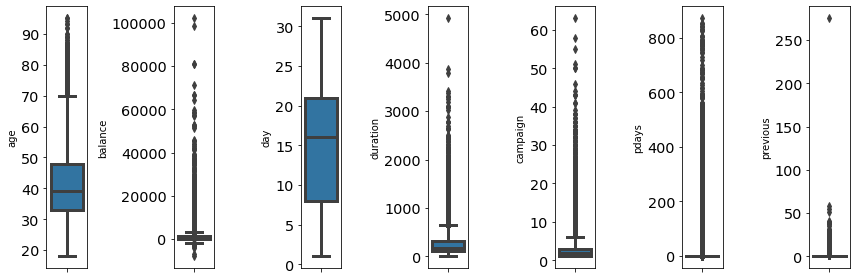

In [ ]:
features = nums.columns
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=train[features[i]], orient='v')
    plt.tight_layout()

Beberapa insight yang bisa diambil:
- Hampir seluruh kolom memiliki outliers
- Tampak hampir semua feature berdistribusi *skewed*, kecuali `day`
- Feature `day` tidak memiliki outliers karena menunjukkan tanggal pada bulan, sehingga nilainya dari 1 s/d 31

### Dist Plot

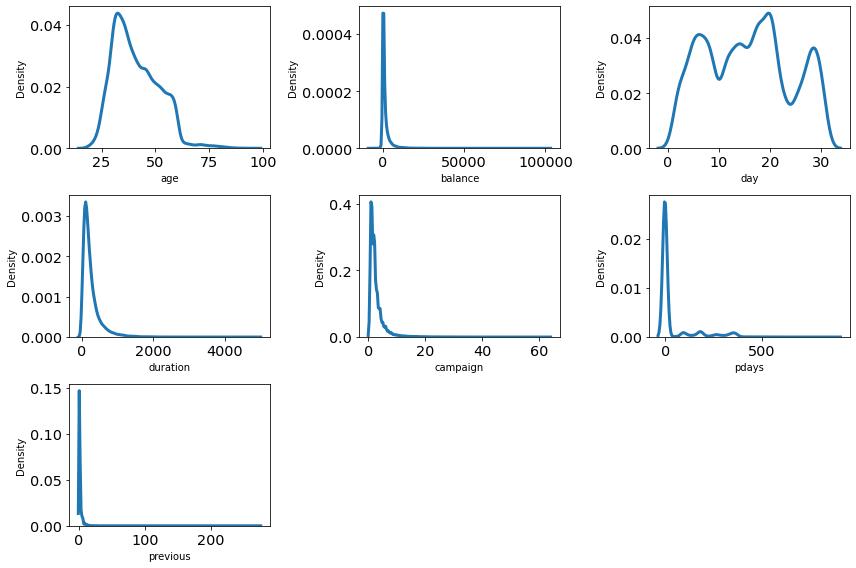

In [ ]:
features = nums.columns
plt.figure(figsize=(12, 8))
for i in range(0, len(features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=train[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout();

Beberapa insight yang bisa diambil:
- Hampir seluruh feature berdistribusi positively skewed
- Feature `day` tampak memiliki 3 puncak (trimodal distribution)

Saran: 
- Melakukan log transformasi untuk feature yang sangat-sangat skewed

### Count Plot (categorical)

In [ ]:
cats.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [ ]:
len(cats.columns)

10

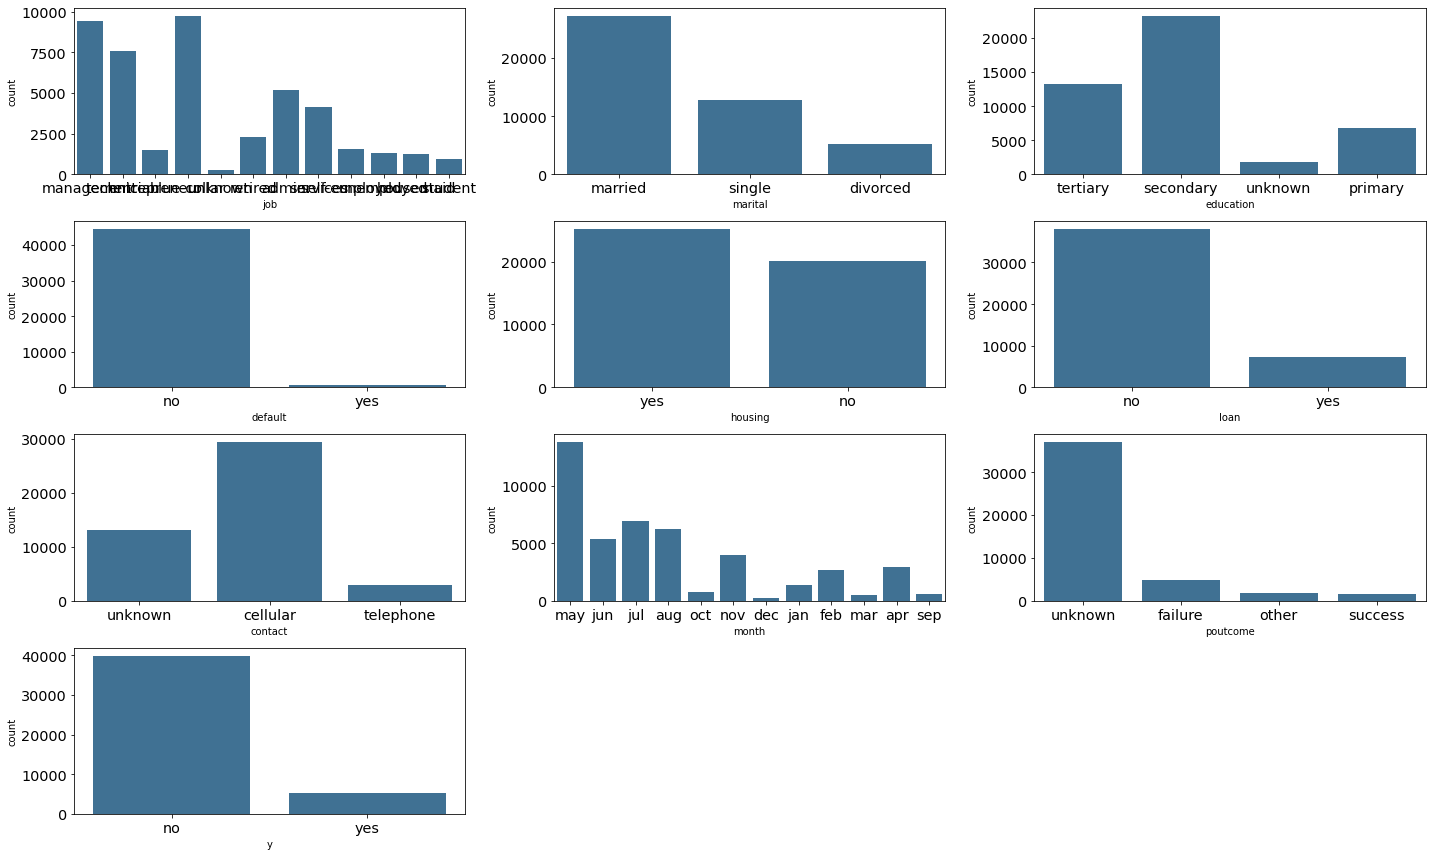

In [ ]:
features = cats.columns
plt.figure(figsize=(20, 12))
for i in range(0, len(features)):
    plt.subplot(4, 3, i+1)
    sns.countplot(x = train[features[i]], color='#3274A1', orient='v')
    plt.tight_layout()

Beberapa insight yang dapat diambil:
- Mayoritas `poutcome` (hasil dari campaign sebelumnya) bernilai unknown
- Mayoritas user dihubungi melalui contact celluar (`contact`)
- Mayoritas user dihubungi pada bulan Mei
- Distribusi user pada yang memiliki KPR dan tidak, cukup berdekatan (`housing`)
- Mayoritas user tidak gagal bayar (`default`)
- Mayoritas user tidak memiliki utang (`loan`)
- Mayoritas user tidak subscribe pada term deposit (`y`)

## Part Follow-up in The Next Stage from Univariate Analysis

- Tidak ada data missing values sehingga tidak perlu dilakukan pre-processing 'drop'. Namun, dikarenakan ada data yang 'unknown' pada kolom job`, `education`, `contact`, dan `poutcome` sehingga perlu adanya pre-processing untuk data Categorical tersebut.
- Banyak data outliers, sehingga perlu dilakukan penghapusan data oulier jika diperluka pada kolom yang memiliki correlation yang tinggi terhadap column targeted.
- Pada kolom summary tidak ada keanehan untuk nilai mean dan median. Namun, yang jadi permasalahan ialah data pada kolom 'balance' Kolom `balance` menunjukkan jumlah saldo user dalam bank. Terdapat nilai negatif disini, apakah mungkin saldo bernilai negatif (utang?)
-kolom target 'y' masih berbentuk categoricals diperlukan preprocessing untuk encoding menjadi numericals dengan menggunakan feature encoding. dikarenakan tidak semua model dapat menggunakan feature categorical, apalagi kita kesuliatan untuk melihat correlation dengan menggunakan column targeted yang berbentuk categoricals.
- Banyak kolom yang mengalami class imbalance apalagi pada column targeted. Perlu adanya perlakuan di pre-processing untuk oversampling atau undersampling (?)

## Bivariate Analysis

In [6]:
y_map = {
    'yes' : 1,
    'no' : 0
}

train['y_map'] = train['y'].map(y_map)

In [ ]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_map
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [ ]:
train.corr()

,age,balance,day,duration,campaign,pdays,previous,y_map
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y_map,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


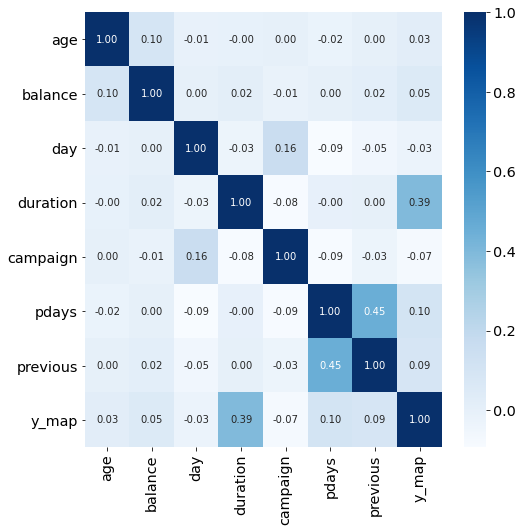

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.corr(), cmap='Blues', annot=True, fmt='.2f');

Beberapa insight yang dapat diambil:
- pdays memiliki korelasi positif lemah dengan previous
- duration memiliki nilai korelasi yang lumayan kuat terhadap y

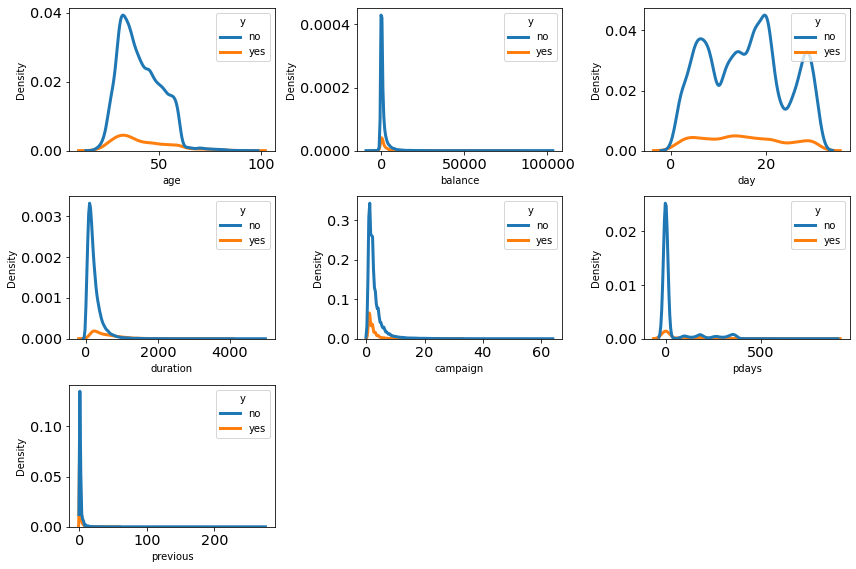

In [ ]:
features = nums.columns
plt.figure(figsize=(12, 8))
for i in range(0, len(features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=train[features[i]], hue=train['y'])
    plt.xlabel(features[i])
    plt.tight_layout();

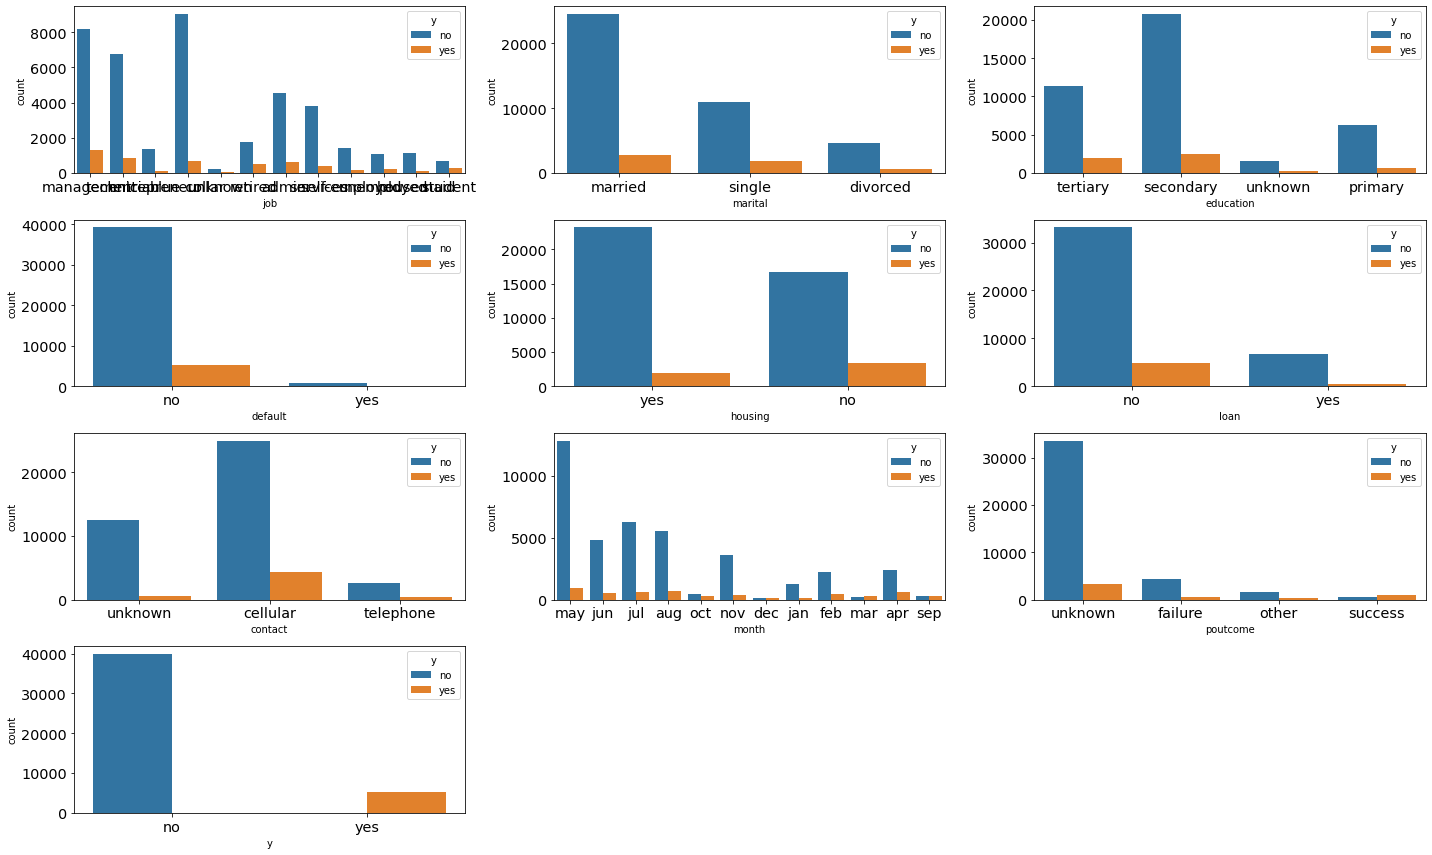

In [ ]:
features = cats.columns
plt.figure(figsize=(20, 12))
for i in range(0, len(features)):
    plt.subplot(4, 3, i+1)
    sns.countplot(x = train[features[i]], orient='v', hue=train['y'])
    plt.tight_layout()

Beberapa insight yang dapat diambil:
- Tampaknya user yang tidak gagal bayar (no pada `default`) lebih cenderung untuk subscribe ke term deposit
- Tampaknya user yang tidak punya utang (no pada `loan`) lebih cenderung untuk subscribe ke term deposit

## Business Insight

C:\Users\dias_mdf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


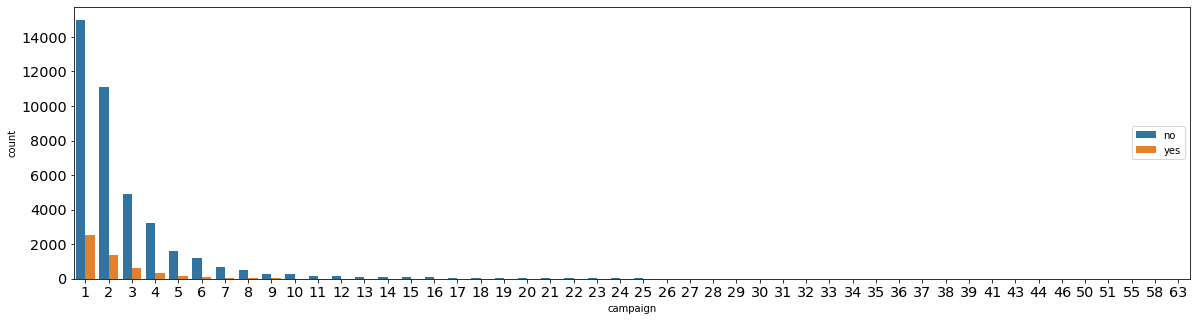

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot('campaign', data=train, hue='y')
plt.legend(loc='center right');

Jumlah campaign 1-3 tampaknya adalah jumlah yang optimum agar user subscribe ke term deposit. Tim marketing harus menemukan metode campaign  yang optimal agar cukup 1 sampai 3 kali user dihubungi, user akan mau untuk subscribe ke deposit.

Default mayoritas no, subscribed mayoritas no

## Fitur Duration
Duration memiliki korelasi yang cukup tinggi dengan y (subscribe)

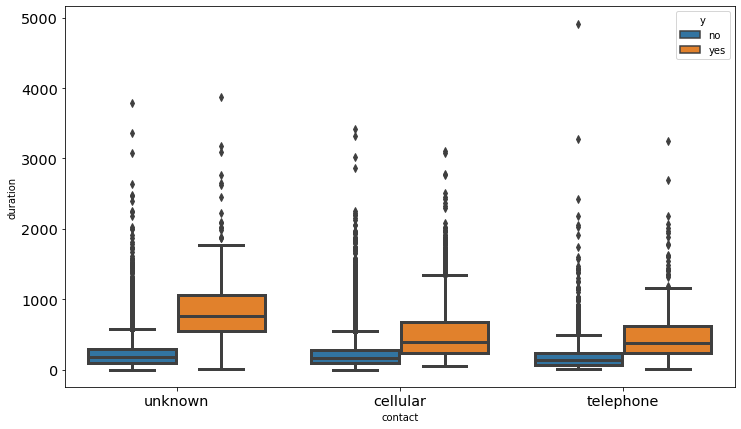

In [7]:
#Duration vs contact

plt.figure(figsize=(12,7))
sns.boxplot(x='contact', y='duration', hue='y', data=train)

Dari Boxplot Contact and Duration, customer yang durasi teleponnya singkat cenderung menolak tawaran deposito. Artinya kita dapat menduga jika menit-menit awal (1-3 menit awal) adalah waktu yang sangat menentukan/krusial untuk menawarkan deposito. Harus dicek apa saja yg sudah disampaikan oleh tim sales/customer success pada 1-3 menit awal. Ketika tidak mendapatkan atensi pada 2 menit awal, maka customer akan menolak (churn). Ketika kita bisa menyampaikan informasi dengan baik di 1-3 menit pertama, maka ada potensi berhasil (masuk kategori 5-6 menit)

Business rekomendasi:
1. Menstandarisasi teks yang akan kita sampaikan ke customer
2. Karena produk kita sebenarnya bagus dan artinya mereka yg sudah memakai produk kita retention ratenya tinggi. Maka bisa jadi business rekomendasi kedua, yaitu testimoni produk dari pengguna sebelumnya 2-3 menit awal penyampaian benefit dan testimoni

<AxesSubplot:xlabel='age', ylabel='Count'>

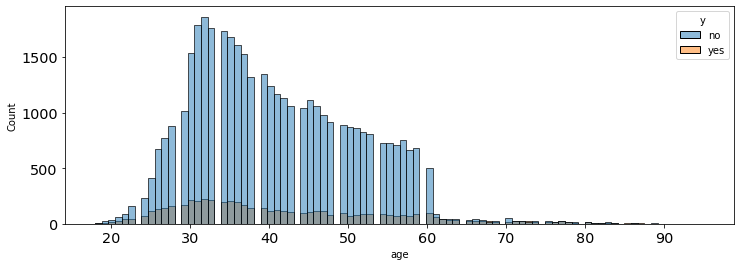

In [ ]:
sns.histplot(x=train['age'], hue=train['y'])

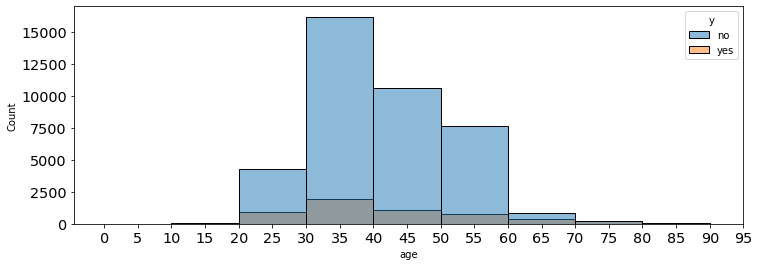

In [ ]:
sns.histplot(x=train['age'], hue=train['y'], bins=range(0,100,10))
plt.xticks(range(0,100,5));

<AxesSubplot:xlabel='job', ylabel='balance'>

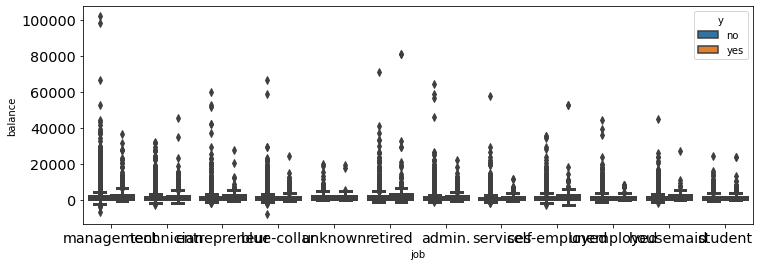

In [ ]:
sns.boxplot(x=train['job'], y=train['balance'], hue=train['y'])

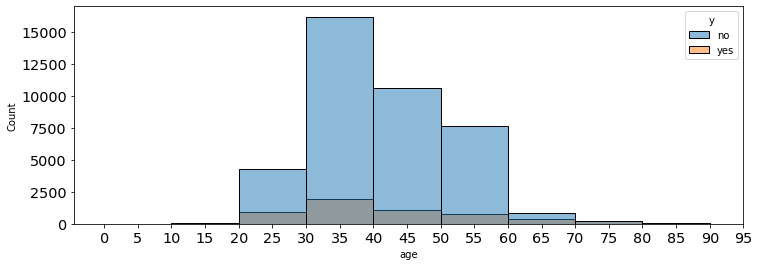

In [ ]:
sns.histplot(x=train['age'], hue=train['y'], bins=range(0,100,10))
plt.xticks(range(0,100,5));

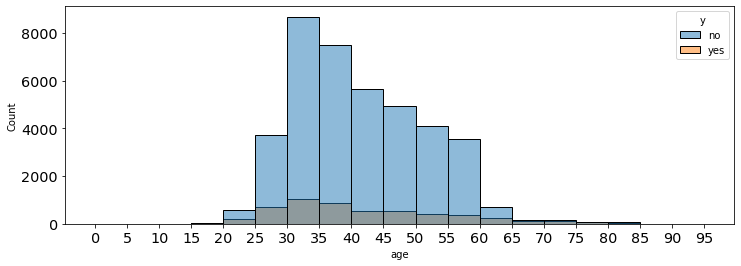

In [ ]:
sns.histplot(x=train['age'], hue=train['y'], bins=range(0,100,5))
plt.xticks(range(0,100,5));

<AxesSubplot:xlabel='age'>

<Figure size 2880x1440 with 0 Axes>

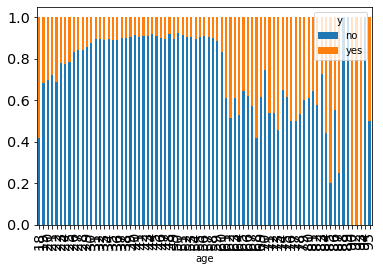

In [ ]:
%matplotlib inline
plt.figure(figsize=(40,20))
train.groupby('age')['y'].value_counts(normalize=True).unstack('y').plot.bar(stacked=True)